In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Kernels**

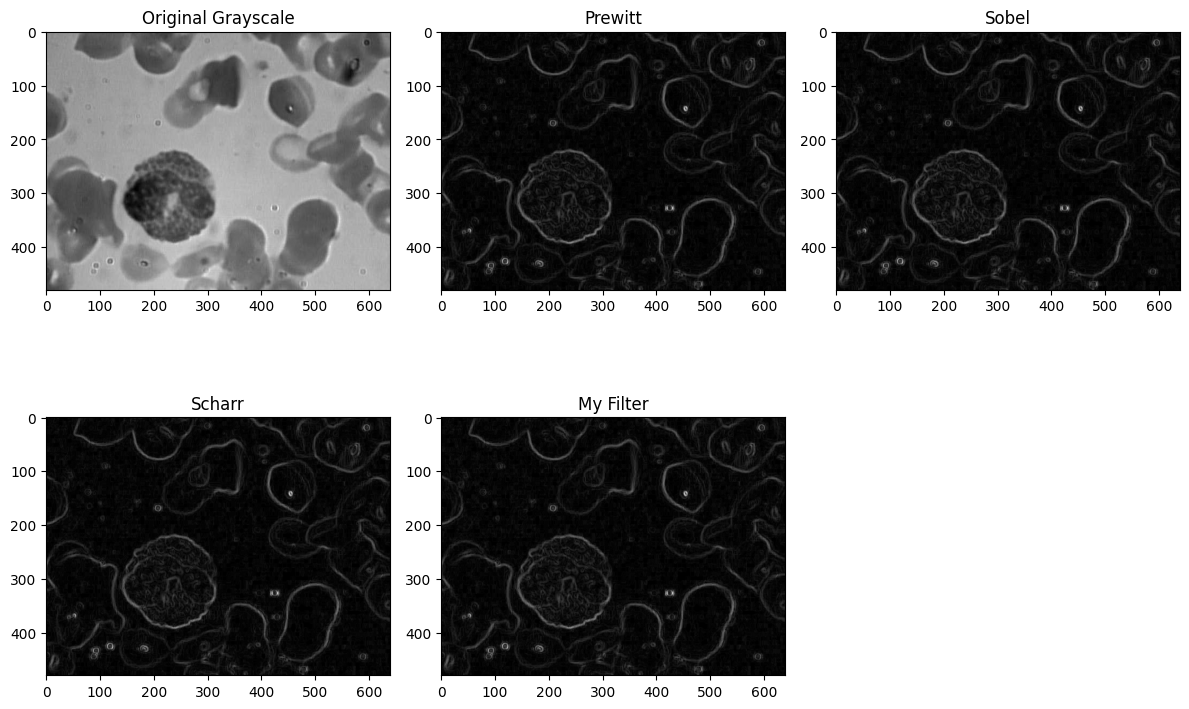

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---- Load image  ----
image_path = '/content/drive/MyDrive/ComputerVision/BloodImage_00017.jpg'

img = cv2.imread(image_path, cv2.IMREAD_COLOR)
if img is None:
    raise FileNotFoundError(f"❌ Image not found at: {image_path}\n"
                            "Make sure your path is correct and Drive is mounted.")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ---- Prewitt ----
prewitt_x = np.array([[1, 0, -1],
                      [1, 0, -1],
                      [1, 0, -1]], dtype=np.float32)
prewitt_y = np.array([[1, 1, 1],
                      [0, 0, 0],
                      [-1, -1, -1]], dtype=np.float32)
Gx_p = cv2.filter2D(gray, cv2.CV_64F, prewitt_x)
Gy_p = cv2.filter2D(gray, cv2.CV_64F, prewitt_y)
prewitt = np.sqrt(Gx_p**2 + Gy_p**2)

# ---- Sobel ----
sobel_x = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]], dtype=np.float32)
sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]], dtype=np.float32)
Gx_s = cv2.filter2D(gray, cv2.CV_64F, sobel_x)
Gy_s = cv2.filter2D(gray, cv2.CV_64F, sobel_y)
sobel = np.sqrt(Gx_s**2 + Gy_s**2)

# ---- Scharr ----
scharr_x = np.array([[3, 0, -3],
                     [10, 0, -10],
                     [3, 0, -3]], dtype=np.float32)
scharr_y = np.array([[3, 10, 3],
                     [0, 0, 0],
                     [-3, -10, -3]], dtype=np.float32)
Gx_c = cv2.filter2D(gray, cv2.CV_64F, scharr_x)
Gy_c = cv2.filter2D(gray, cv2.CV_64F, scharr_y)
scharr = np.sqrt(Gx_c**2 + Gy_c**2)

# ---- My filter ----
#inspired by Scharr
my_filter_x = np.array([[5, 0, -5],
                     [20, 0, -20],
                     [5, 0, -5]], dtype=np.float32)

my_filter_y = np.array([[5, 20, 5],
                     [0, 0, 0],
                     [-5, -20, -5]], dtype=np.float32)

Gx_custom = cv2.filter2D(gray, cv2.CV_64F, my_filter_x)
Gy_custom = cv2.filter2D(gray, cv2.CV_64F, my_filter_y)
custom = np.sqrt(Gx_custom**2 + Gy_custom**2)

# ---- Safe normalization ----
def normalize(img):
    if img is None or img.size == 0:
        print("⚠️ Warning: empty image passed to normalize()")
        return np.zeros((100, 100), dtype=np.uint8)
    norm = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
    return norm.astype(np.uint8)

prewitt = normalize(prewitt)
sobel = normalize(sobel)
scharr = normalize(scharr)
custom = normalize(custom)

# ---- Display results ----
plt.figure(figsize=(12, 8))
plt.subplot(2,3,1), plt.imshow(gray, cmap='gray'), plt.title('Original Grayscale')
plt.subplot(2,3,2), plt.imshow(prewitt, cmap='gray'), plt.title('Prewitt')
plt.subplot(2,3,3), plt.imshow(sobel, cmap='gray'), plt.title('Sobel')
plt.subplot(2,3,4), plt.imshow(scharr, cmap='gray'), plt.title('Scharr')
plt.subplot(2,3,5), plt.imshow(custom, cmap='gray'), plt.title('My Filter')
plt.tight_layout()
plt.show()

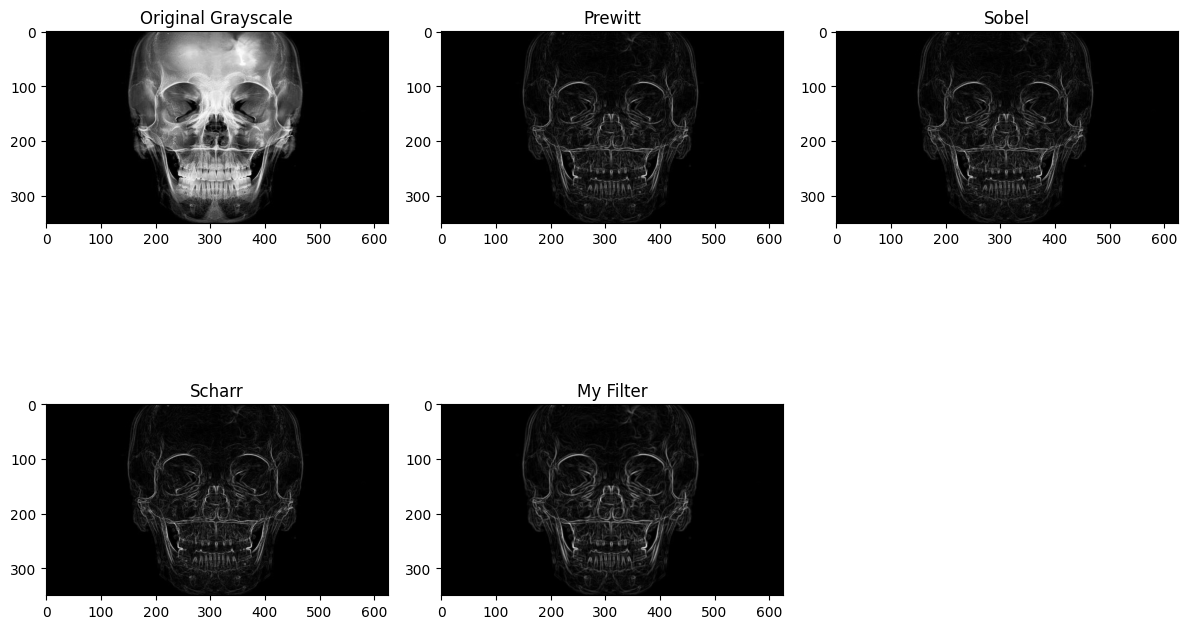

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---- Load image safely ----
image_path = '/content/drive/MyDrive/ComputerVision/44.jpeg'

img = cv2.imread(image_path, cv2.IMREAD_COLOR)
if img is None:
    raise FileNotFoundError(f"❌ Image not found at: {image_path}\n"
                            "Make sure your path is correct and Drive is mounted.")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ---- Prewitt ----
prewitt_x = np.array([[1, 0, -1],
                      [1, 0, -1],
                      [1, 0, -1]], dtype=np.float32)
prewitt_y = np.array([[1, 1, 1],
                      [0, 0, 0],
                      [-1, -1, -1]], dtype=np.float32)
Gx_p = cv2.filter2D(gray, cv2.CV_64F, prewitt_x)
Gy_p = cv2.filter2D(gray, cv2.CV_64F, prewitt_y)
prewitt = np.sqrt(Gx_p**2 + Gy_p**2)

# ---- Sobel ----
sobel_x = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]], dtype=np.float32)
sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]], dtype=np.float32)
Gx_s = cv2.filter2D(gray, cv2.CV_64F, sobel_x)
Gy_s = cv2.filter2D(gray, cv2.CV_64F, sobel_y)
sobel = np.sqrt(Gx_s**2 + Gy_s**2)

# ---- Scharr ----
scharr_x = np.array([[3, 0, -3],
                     [10, 0, -10],
                     [3, 0, -3]], dtype=np.float32)
scharr_y = np.array([[3, 10, 3],
                     [0, 0, 0],
                     [-3, -10, -3]], dtype=np.float32)
Gx_c = cv2.filter2D(gray, cv2.CV_64F, scharr_x)
Gy_c = cv2.filter2D(gray, cv2.CV_64F, scharr_y)
scharr = np.sqrt(Gx_c**2 + Gy_c**2)

# ---- My filter ----
my_filter_x = np.array([
    [  1,   2,   0,  -2,  -1],
    [  4,   8,   0,  -8,  -4],
    [  6,  12,   0, -12,  -6],
    [  4,   8,   0,  -8,  -4],
    [  1,   2,   0,  -2,  -1]
], dtype=np.float32)

my_filter_y = np.array([
    [  1,   4,   6,   4,   1],
    [  2,   8,  12,   8,   2],
    [  0,   0,   0,   0,   0],
    [ -2,  -8, -12,  -8,  -2],
    [ -1,  -4,  -6,  -4,  -1]
], dtype=np.float32)

Gx_custom = cv2.filter2D(gray, cv2.CV_64F, my_filter_x)
Gy_custom = cv2.filter2D(gray, cv2.CV_64F, my_filter_y)
custom = np.sqrt(Gx_custom**2 + Gy_custom**2)

# ---- Safe normalization ----
def normalize(img):
    if img is None or img.size == 0:
        print("⚠️ Warning: empty image passed to normalize()")
        return np.zeros((100, 100), dtype=np.uint8)
    norm = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
    return norm.astype(np.uint8)

prewitt = normalize(prewitt)
sobel = normalize(sobel)
scharr = normalize(scharr)
custom = normalize(custom)

# ---- Display results ----
plt.figure(figsize=(12, 8))
plt.subplot(2,3,1), plt.imshow(gray, cmap='gray'), plt.title('Original Grayscale')
plt.subplot(2,3,2), plt.imshow(prewitt, cmap='gray'), plt.title('Prewitt')
plt.subplot(2,3,3), plt.imshow(sobel, cmap='gray'), plt.title('Sobel')
plt.subplot(2,3,4), plt.imshow(scharr, cmap='gray'), plt.title('Scharr')
plt.subplot(2,3,5), plt.imshow(custom, cmap='gray'), plt.title('My Filter')
plt.tight_layout()
plt.show()

## **Blob Detection**

Processing image: /content/drive/MyDrive/ComputerVision/eosino2.jpeg


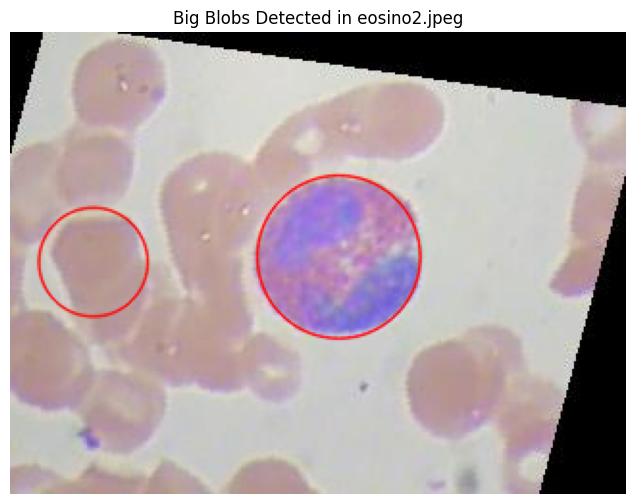

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


image_paths = [
    '/content/drive/MyDrive/ComputerVision/eosino2.jpeg'
]

for image_path in image_paths:
    print(f"Processing image: {image_path}")
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None:
        print(f"❌ Error: Could not load image from {image_path}. Skipping.\n" + "Make sure your path is correct and Drive is mounted.")
        continue

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Set up the SimpleBlobDetector parameters.
    params = cv2.SimpleBlobDetector_Params()

    # Filter by Area.
    params.filterByArea = True
    params.minArea = 500
    params.maxArea = 10000

    # Filter by Circularity
    params.filterByCircularity = True
    params.minCircularity = 0.3

    # Filter by Convexity
    params.filterByConvexity = True
    params.minConvexity = 0.5

    # Filter by Inertia
    params.filterByInertia = True
    params.minInertiaRatio =

    # Create a detector with the parameters
    detector = cv2.SimpleBlobDetector_create(params)

    # Detect blobs.
    keypoints = detector.detect(gray)

    # Draw detected blobs as red circles.
    # cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
    blob_image = cv2.drawKeypoints(img, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Display results
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(blob_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Big Blobs Detected in {os.path.basename(image_path)}')
    plt.axis('off')
    plt.show()

Processing image: /content/drive/MyDrive/ComputerVision/lymph1.jpeg


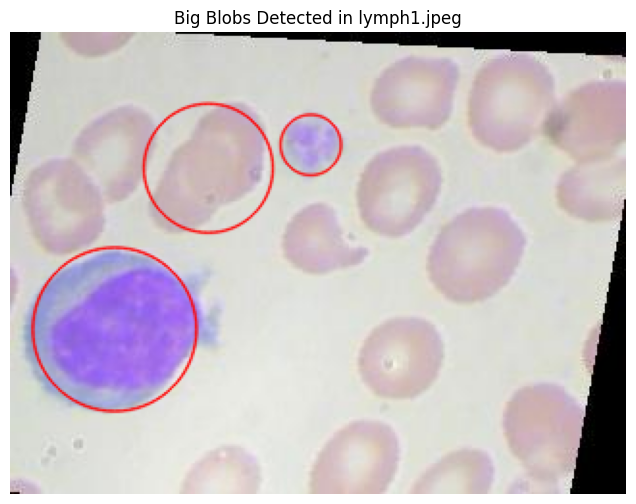

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


image_paths = [
    '/content/drive/MyDrive/ComputerVision/lymph1.jpeg'
]

for image_path in image_paths:
    print(f"Processing image: {image_path}")
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None:
        print(f"❌ Error: Could not load image from {image_path}. Skipping.\n" + "Make sure your path is correct and Drive is mounted.")
        continue

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Set up the SimpleBlobDetector parameters.
    params = cv2.SimpleBlobDetector_Params()

    # Filter by Area.
    params.filterByArea = True
    params.minArea = 500
    params.maxArea = 10000

    # Filter by Circularity
    params.filterByCircularity = True
    params.minCircularity = 0.3

    # Filter by Convexity
    params.filterByConvexity = True
    params.minConvexity = 0.5

    # Filter by Inertia
    params.filterByInertia = True
    params.minInertiaRatio = 0.001

    # Create a detector with the parameters
    detector = cv2.SimpleBlobDetector_create(params)

    # Detect blobs.
    keypoints = detector.detect(gray)

    # Draw detected blobs as red circles.
    # cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
    blob_image = cv2.drawKeypoints(img, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Display results
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(blob_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Big Blobs Detected in {os.path.basename(image_path)}')
    plt.axis('off')
    plt.show()


Processing image: /content/drive/MyDrive/ComputerVision/lymph2.jpeg


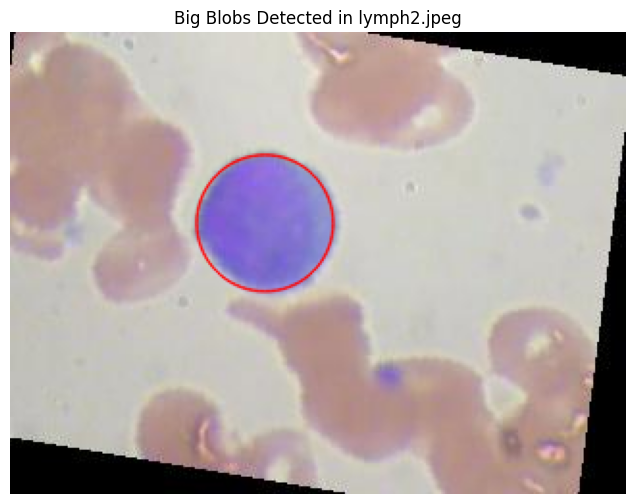

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

image_paths = [
    '/content/drive/MyDrive/ComputerVision/lymph2.jpeg'
]

for image_path in image_paths:
    print(f"Processing image: {image_path}")
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None:
        print(f"❌ Error: Could not load image from {image_path}. Skipping.\n" + "Make sure your path is correct and Drive is mounted.")
        continue

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Set up the SimpleBlobDetector parameters.
    params = cv2.SimpleBlobDetector_Params()

    # Filter by Area.
    params.filterByArea = True
    params.minArea = 500
    params.maxArea = 10000

    # Filter by Circularity
    params.filterByCircularity = True
    params.minCircularity = 0.3

    # Filter by Convexity
    params.filterByConvexity = True
    params.minConvexity = 0.5

    # Filter by Inertia
    params.filterByInertia = True
    params.minInertiaRatio = 0.001

    # Create a detector with the parameters
    detector = cv2.SimpleBlobDetector_create(params)

    # Detect blobs.
    keypoints = detector.detect(gray)

    # Draw detected blobs as red circles.
    # cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
    blob_image = cv2.drawKeypoints(img, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Display results
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(blob_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Big Blobs Detected in {os.path.basename(image_path)}')
    plt.axis('off')
    plt.show()


Processing image: /content/drive/MyDrive/ComputerVision/mono2.jpeg


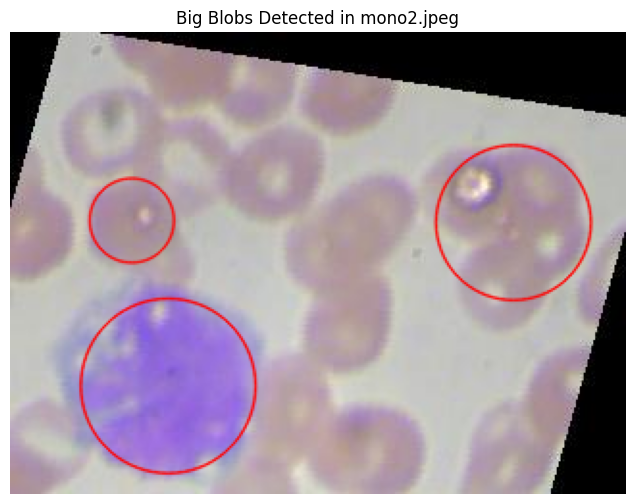

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

image_paths = [
    '/content/drive/MyDrive/ComputerVision/mono2.jpeg'
]

for image_path in image_paths:
    print(f"Processing image: {image_path}")
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None:
        print(f"❌ Error: Could not load image from {image_path}. Skipping.\n" + "Make sure your path is correct and Drive is mounted.")
        continue

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Set up the SimpleBlobDetector parameters.
    params = cv2.SimpleBlobDetector_Params()

    # Filter by Area.
    params.filterByArea = True
    params.minArea = 500
    params.maxArea = 10000

    # Filter by Circularity
    params.filterByCircularity = True
    params.minCircularity = 0.3

    # Filter by Convexity
    params.filterByConvexity = True
    params.minConvexity = 0.5

    # Filter by Inertia
    params.filterByInertia = True
    params.minInertiaRatio = 0.001

    # Create a detector with the parameters
    detector = cv2.SimpleBlobDetector_create(params)

    # Detect blobs.
    keypoints = detector.detect(gray)

    # Draw detected blobs as red circles.
    # cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
    blob_image = cv2.drawKeypoints(img, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Display results
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(blob_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Big Blobs Detected in {os.path.basename(image_path)}')
    plt.axis('off')
    plt.show()


### DOG

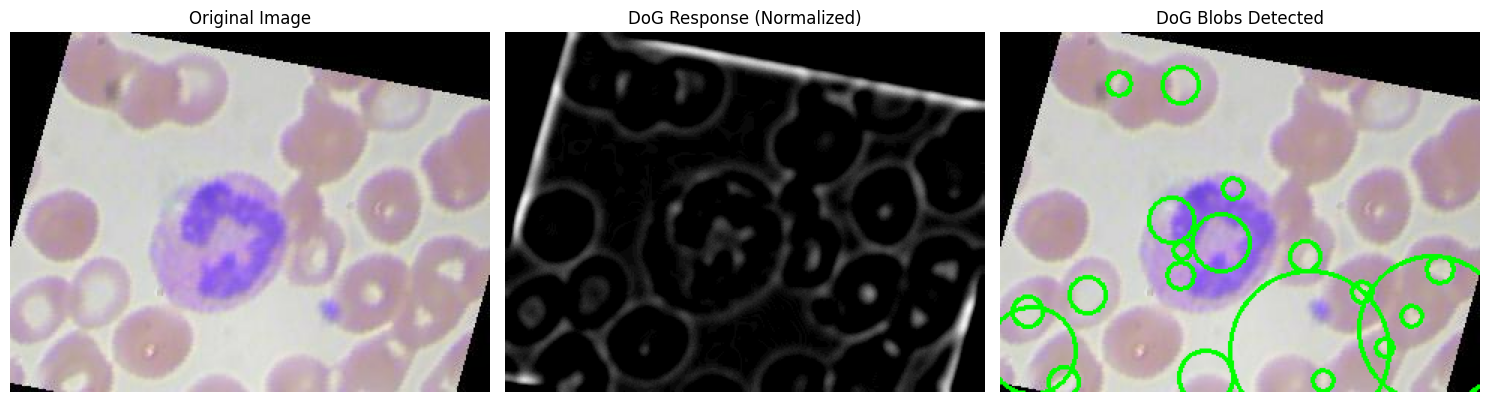

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/ComputerVision/neutro2.jpeg'


img = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Check if the image was loaded successfully
if img is None:
    raise FileNotFoundError(f"❌ Error: Could not load image from {image_path}. Please check the path and ensure your Google Drive is mounted.")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# --- Difference of Gaussians (DoG) Blob Detection ---

# Apply two Gaussian blurs with different sigma values
sigma1 = 3
sigma2 = 1.6 * sigma1

blurred1 = cv2.GaussianBlur(gray, (0, 0), sigma1)
blurred2 = cv2.GaussianBlur(gray, (0, 0), sigma2)

# Compute the Difference of Gaussians
dog = cv2.subtract(blurred1, blurred2)

# Normalize DoG for visualization (optional, but good practice)
dog_norm = cv2.normalize(dog, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)


# Threshold the DoG image to highlight strong responses
threshold = 25
_, binary_dog = cv2.threshold(dog_norm, threshold, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(binary_dog, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw detected blobs as circles on the original image
blob_image_dog = img.copy()
for contour in contours:
    # Approximate contour to a circle
    (x, y), radius = cv2.minEnclosingCircle(contour)
    center = (int(x), int(y))
    radius = int(radius)


    if radius > 5 and radius < 100:
        cv2.circle(blob_image_dog, center, radius, (0, 255, 0), 2) # Green circles

# Display results
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(dog_norm, cmap='gray')
plt.title('DoG Response (Normalized)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(blob_image_dog, cv2.COLOR_BGR2RGB))
plt.title('DoG Blobs Detected')
plt.axis('off')

plt.tight_layout()
plt.show()


### **LOG**

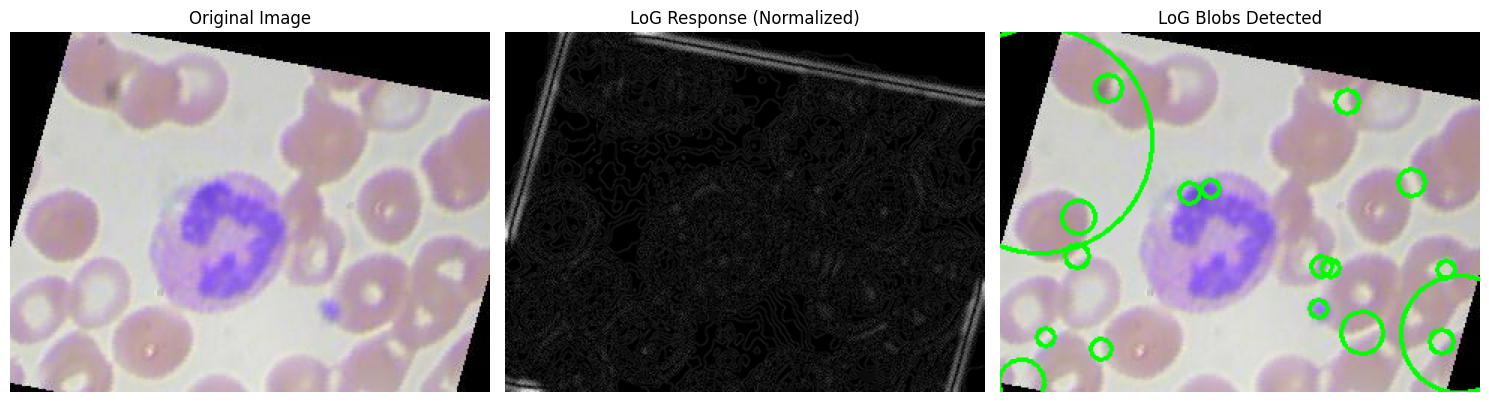

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/ComputerVision/neutro2.jpeg'

# Load the image
img = cv2.imread(image_path, cv2.IMREAD_COLOR)


if img is None:
    raise FileNotFoundError(f"❌ Error: Could not load image from {image_path}. Please check the path and ensure your Google Drive is mounted.")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# --- Laplacian of Gaussian (LoG) Blob Detection ---

# Apply Gaussian blur
sigma = 2.3
blurred_img = cv2.GaussianBlur(gray, (0, 0), sigma)

# Apply Laplacian operator
# cv2.CV_64F for output depth to handle negative values from Laplacian
log_response = cv2.Laplacian(blurred_img, cv2.CV_64F)

# Normalize LoG for visualization and thresholding
# Absolute value is often taken to visualize both bright and dark blobs
log_abs = cv2.convertScaleAbs(log_response)

# Normalize to 0-255 for display
log_norm = cv2.normalize(log_abs, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Threshold the LoG image to highlight strong responses
threshold = 25
_, binary_log = cv2.threshold(log_norm, threshold, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(binary_log, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw detected blobs as circles on the original image
blob_image_log = img.copy()
for contour in contours:
    # Approximate contour to a circle
    (x, y), radius = cv2.minEnclosingCircle(contour)
    center = (int(x), int(y))
    radius = int(radius)


    if radius > 5 and radius < 100: #only draw blobs within a certain radius range
        cv2.circle(blob_image_log, center, radius, (0, 255, 0), 2) # Green circles

# Display results
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(log_norm, cmap='gray')
plt.title('LoG Response (Normalized)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(blob_image_log, cv2.COLOR_BGR2RGB))
plt.title('LoG Blobs Detected')
plt.axis('off')

plt.tight_layout()
plt.show()


## **`SIFT`**

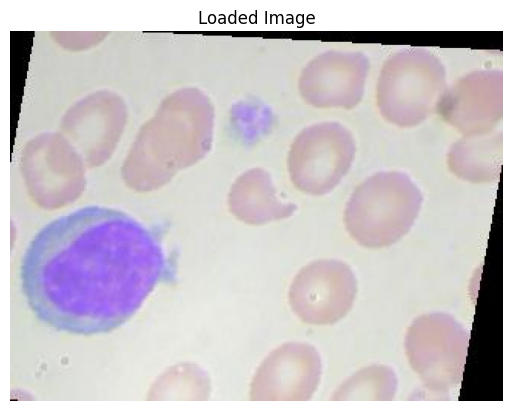

In [47]:
#Original image
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/MyDrive/ComputerVision/lymph1.jpeg")

# Check if the image was loaded successfully
if img is None:
    print("Error: Could not load image. Please check the path and ensure your Google Drive is mounted.")
else:
    # Convert BGR image to RGB for matplotlib display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.imshow(img_rgb)
    plt.title("Loaded Image")
    plt.axis('off') # Hide axes for cleaner image display
    plt.show()




Detected 51 keypoints on the original image.
Descriptors shape for original image: (51, 128)


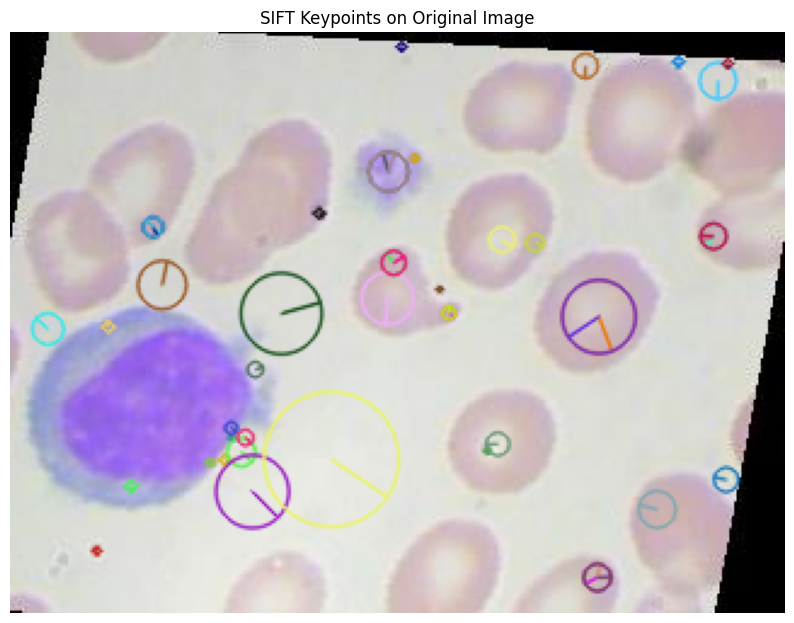

In [55]:
#SIFT for the original image
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/ComputerVision/lymph1.jpeg'

# Load the image
original_img = cv2.imread(image_path)

# Check if the image was loaded successfully
if original_img is None:
    raise FileNotFoundError(f"❌ Error: Could not load image from {image_path}. Please check the path and ensure your Google Drive is mounted.")

# Convert to grayscale
gray_original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints_original, descriptors_original = sift.detectAndCompute(gray_original_img, None)

print(f"Detected {len(keypoints_original)} keypoints on the original image.")
print(f"Descriptors shape for original image: {descriptors_original.shape if descriptors_original is not None else 'None'}")

# Visualize the keypoints on the original image
keypoint_img_original = cv2.drawKeypoints(original_img, keypoints_original, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(keypoint_img_original, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints on Original Image')
plt.axis('off')
plt.show()

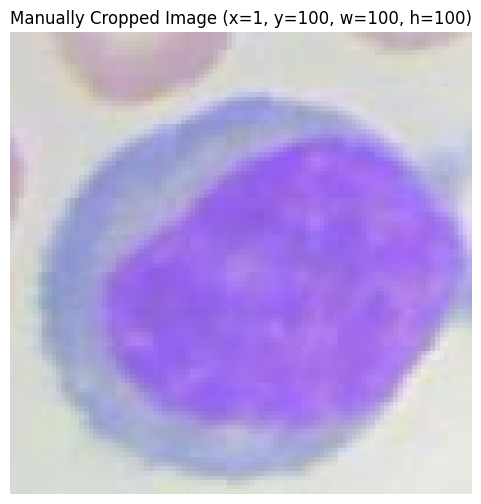

In [8]:
#croppe
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/ComputerVision/lymph1.jpeg'
img = cv2.imread(image_path)

if img is None:
    print(f"Error: Could not load image from {image_path}. Please check the path and ensure your Google Drive is mounted.")
else:
    # Define the cropping region (x, y, width, height)
    x = 1  # X-coordinate of the top-left corner
    y = 100  # Y-coordinate of the top-left corner
    width = 100 # Width of the cropped region
    height = 100 # Height of the cropped region

    # Crop the image using NumPy array slicing
    # Note: NumPy slicing uses [y_start:y_end, x_start:x_end]
    cropped_img = img[y : y + height, x : x + width]

    # Convert the cropped image from BGR to RGB for displaying with matplotlib
    cropped_img_rgb = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)

    # Display the cropped image
    plt.figure(figsize=(6, 6))
    plt.imshow(cropped_img_rgb)
    plt.title(f'Manually Cropped Image (x={x}, y={y}, w={width}, h={height})')
    plt.axis('off')
    plt.show()

Detected 10 keypoints.
Descriptors shape: (10, 128)


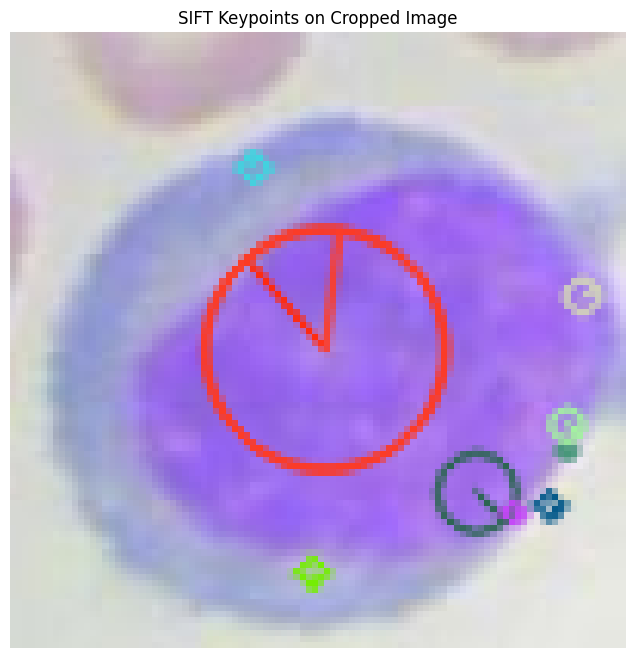

In [37]:
#SIFT for the cropped image, Detect keypoints and  descriptors
gray_cropped_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()

keypoints, descriptors = sift.detectAndCompute(gray_cropped_img, None)

print(f"Detected {len(keypoints)} keypoints.")
print(f"Descriptors shape: {descriptors.shape if descriptors is not None else 'None'}")
keypoint_img = cv2.drawKeypoints(cropped_img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(keypoint_img, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints on Cropped Image')
plt.axis('off')
plt.show()

## Match SIFT Descriptors


Use a **Brute-Force Matcher** to find the best matches between the SIFT descriptors of the `cropped_img` (query) and the `original_img` (training) using `knnMatch` to get the two best matches for each descriptor.
## Filter and Visualize Matches


Apply **Lowe's ratio test** to filter out poor matches, keeping only the most robust ones. Then, visualize these filtered matches by drawing lines between the corresponding keypoints on both images using `cv2.drawMatches` and display the result with `matplotlib`.


Found 10 potential matches, each with 2 neighbors.
Found 6 good matches after Lowe's ratio test.


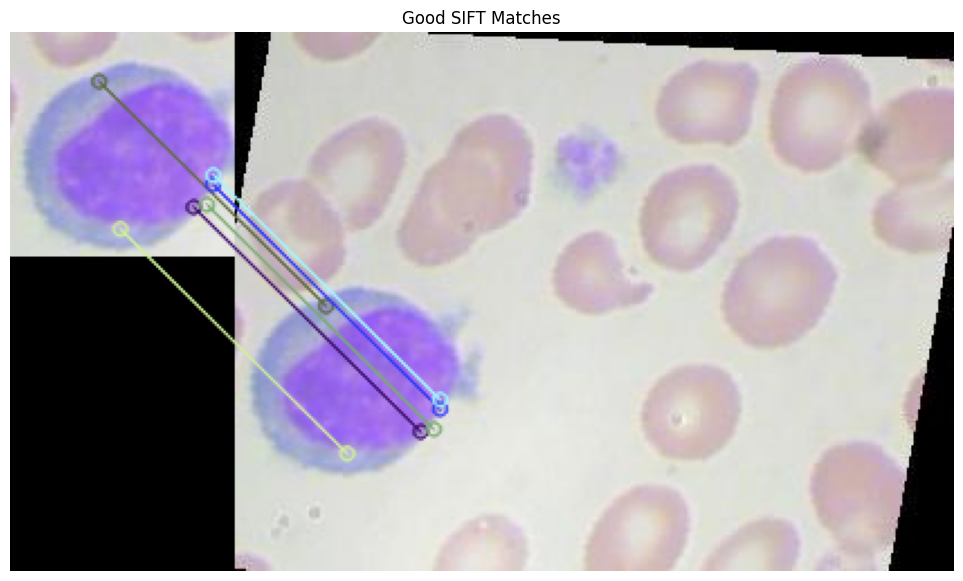

In [40]:
#Match SIFT Descriptors
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors, descriptors_original, k=2)

print(f"Found {len(matches)} potential matches, each with 2 neighbors.")
good_matches = []
for m, n in matches:
    if m.distance < 0.80 * n.distance:
        good_matches.append(m)

print(f"Found {len(good_matches)} good matches after Lowe's ratio test.")

img_matches = cv2.drawMatches(cropped_img, keypoints, original_img, keypoints_original, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15, 7))
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.title('Good SIFT Matches')
plt.axis('off')
plt.show()

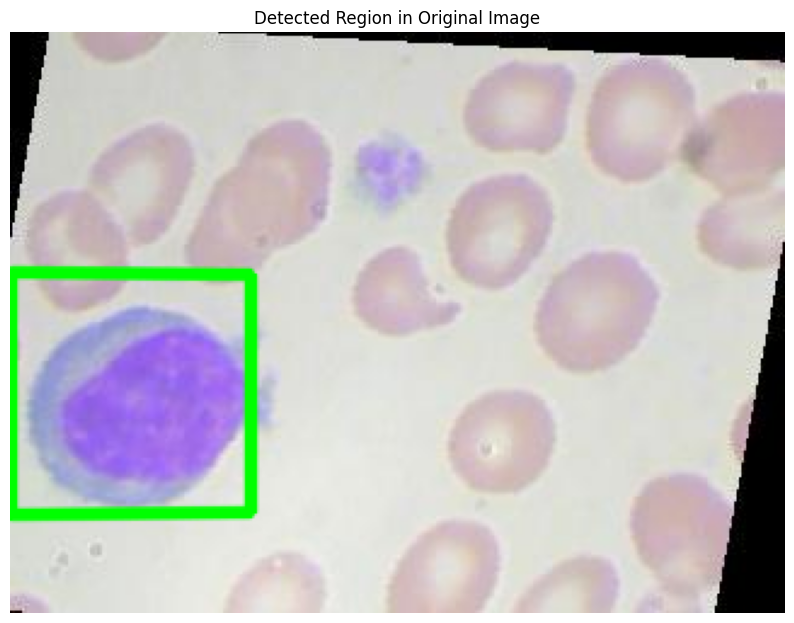

(240, 320, 3)


In [32]:
# Copier l'image originale pour dessiner la bounding box
original_img_with_box = original_img.copy()

# Extraire les positions des keypoints correspondants
src_pts = np.float32([keypoints[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints_original[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Calculer l'homographie avec RANSAC
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Coins de l'image cropée (logo)
h, w, d = cropped_img.shape
pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)

# Transformer les coins avec la matrice d'homographie
dst = cv2.perspectiveTransform(pts, H)

# Dessiner la bounding box sur l'image
original_img_with_box = cv2.polylines(
    original_img_with_box,
    [np.int32(dst)],
    True,
    (0, 255, 0),
    3,
    cv2.LINE_AA
)

# Affichage correct avec matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(original_img_with_box, cv2.COLOR_BGR2RGB))
plt.title('Detected Region in Original Image')
plt.axis('off')
plt.show()

# Vérifier la taille de l'image finale
print(original_img_with_box.shape)


(320, 240, 3)


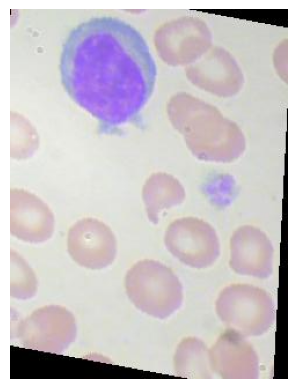

In [48]:
img_rot = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
print(img_rot.shape)
img_rot_rgb = cv2.cvtColor(img_rot, cv2.COLOR_BGR2RGB)

plt.imshow(img_rot_rgb)
plt.axis('off')
plt.show()


Detected 48 keypoints.
Descriptors shape: (48, 128)


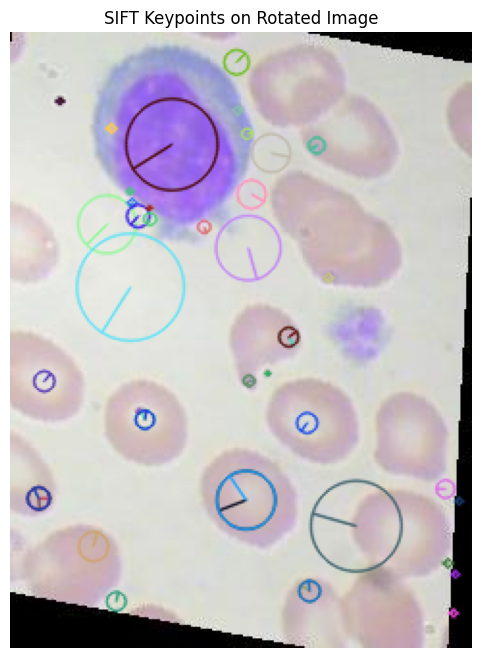

(320, 240)


In [49]:
# 1. Conversion en niveaux de gris (à partir de BGR)
gray_img_rot = cv2.cvtColor(img_rot, cv2.COLOR_BGR2GRAY)

# 2. Création de SIFT
sift = cv2.SIFT_create()

# 3. Détection des keypoints et descripteurs
keypoints_rot, descriptors_rot = sift.detectAndCompute(gray_img_rot, None)

print(f"Detected {len(keypoints_rot)} keypoints.")
print(f"Descriptors shape: {descriptors_rot.shape if descriptors_rot is not None else 'None'}")

# 4. Dessin des keypoints sur l’image pivotée
keypoint_img_rot = cv2.drawKeypoints(
    img_rot,
    keypoints_rot,
    None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# 5. Affichage correct (BGR → RGB)
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(keypoint_img_rot, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints on Rotated Image')
plt.axis('off')
plt.show()
print(gray_img_rot.shape)

In [50]:
#SIFT-> image gris, mais les keypoints se dessinent sur l’image couleur originale.
#Si les nombres sont proches → rotation correcte
print(len(keypoints_original))
print(len(keypoints_rot))

51
48


Found 10 potential matches, each with 2 neighbors.
Found 5 good matches after Lowe's ratio test.


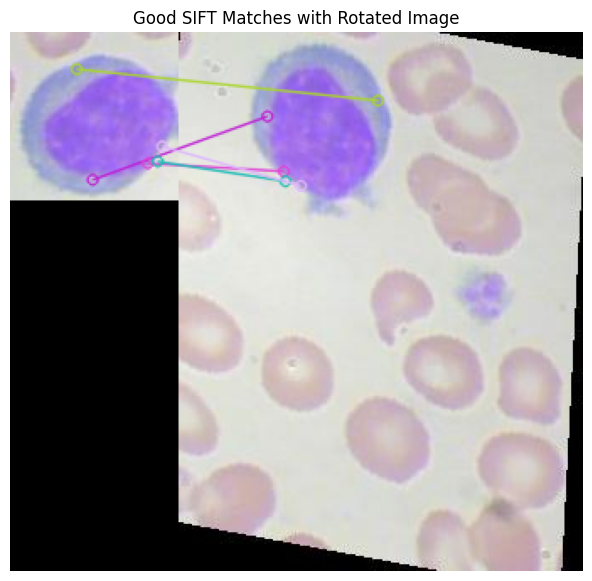

In [52]:
# Création du matcher Brute-Force
bf = cv2.BFMatcher()

# KNN match entre le crop (logo) et l'image pivotée
matches = bf.knnMatch(descriptors_cropped, descriptors_rot, k=2)

print(f"Found {len(matches)} potential matches, each with 2 neighbors.")

# Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

print(f"Found {len(good_matches)} good matches after Lowe's ratio test.")

# Dessiner les bons matches
img_matches = cv2.drawMatches(
    cropped_img,
    keypoints,
    img_rot,
    keypoints_rot,
    good_matches,
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Affichage correct
plt.figure(figsize=(15, 7))
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.title('Good SIFT Matches with Rotated Image')
plt.axis('off')
plt.show()


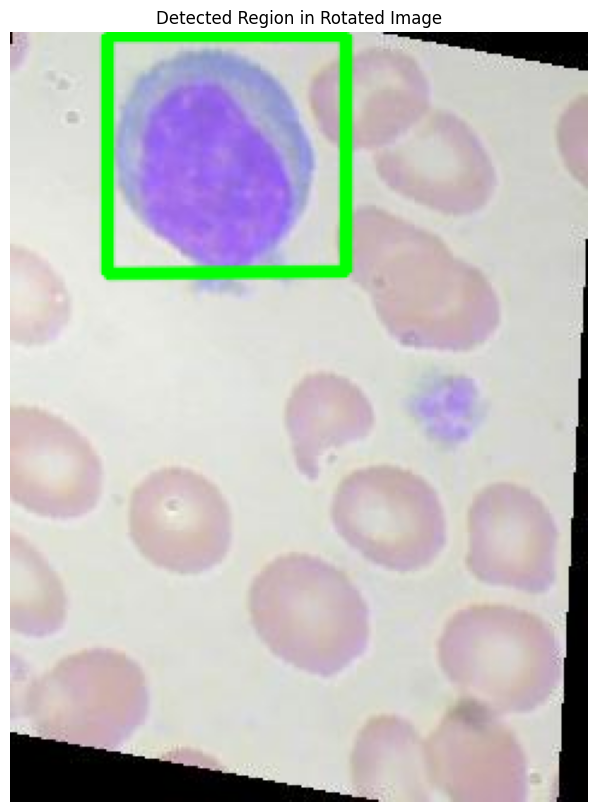

(320, 240, 3)


In [54]:
# Copier l'image pivotée pour dessiner la boîte
rotated_img_with_box = img_rot.copy()

# Extraire les positions des keypoints correspondants
src_pts = np.float32([keypoints[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints_rot[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Calculer l'homographie
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Coins de l'image cropée (query image)
h, w, d = cropped_img.shape
pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)

# Transformer les coins avec la matrice d'homographie
dst = cv2.perspectiveTransform(pts, H)

# Dessiner les lignes pour former la bounding box
rotated_img_with_box = cv2.polylines(
    rotated_img_with_box,
    [np.int32(dst)],
    True,
    (0, 255, 0),
    3,
    cv2.LINE_AA
)

# Affichage correct avec matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(rotated_img_with_box, cv2.COLOR_BGR2RGB))
plt.title('Detected Region in Rotated Image')
plt.axis('off')
plt.show()
print(img_rot.shape)


# Presentation Outline: Image Feature Matching and Object Localization

## 1. Introduction: The Challenge

*   **Problem Statement**: The goal was to detect and precisely locate a specific cell (from a cropped image) within a larger, original blood cell image.



## 2. Key Techniques

### A. SIFT (Scale-Invariant Feature Transform) for Robust Feature Detection

*   **What it is**: SIFT is a powerful algorithm for detecting and describing local features in images. These features are invariant to image scale, rotation, and partially invariant to illumination changes, making them robust.
*   **Steps**:
    1.  **Grayscale Conversion**: Both the `cropped_img` and the `original_img` were converted to grayscale. SIFT primarily operates on grayscale images to simplify calculations and focus on intensity gradients.
    2.  **Keypoint Detection & Descriptor Computation**: SIFT identified unique and distinctive points (keypoints) in both images. For each keypoint, a 128-dimensional descriptor was computed, encapsulating its local appearance.
    *   *Result*: `cropped_img` yielded 10 keypoints, and `original_img` yielded 51 keypoints.

### B. Brute-Force Matching with Lowe's Ratio Test

*   **Purpose**: To find correspondences between **the keypoints** of the two images.
*   **Method**:
    1.  **Brute-Force Matcher (`BFMatcher`)**: A brute-force matcher was used to compare all descriptors from the `cropped_img` with all descriptors from the `original_img`.
    2.  **`knnMatch` (k-Nearest Neighbors Matching)**: For each descriptor in the `cropped_img`, the two closest descriptors in the `original_img` were found.
    3.  **Lowe's Ratio Test**: This critical filtering step eliminated ambiguous matches. By comparing the distance of the best match to the second-best match (ratio of 0.80), only truly distinctive and robust matches were retained.
    *   *Result*: Out of 10 potential matches, 6 robust 'good matches' were identified, ensuring high-quality correspondences.
    *   *Visualization*: We visualized these good matches with lines connecting corresponding keypoints between the cropped and original images, demonstrating successful feature association.

### C. Homography Estimation with RANSAC

*   **What it is**: A homography is a 3x3 transformation matrix that maps points from one plane to another. In our case, it maps the coordinates from the `cropped_img` to its corresponding location in the `original_img`.
*   **Steps**:
    1.  **Keypoint Coordinate Extraction**: The (x,y) coordinates of the 6 good matches were extracted from both the cropped and original images.
    2.  **`cv2.findHomography`**: This function computed the homography matrix (`M`).
    3.  **RANSAC (Random Sample Consensus)**: Integrated into `findHomography`, RANSAC is an algorithm used to robustly estimate model parameters (like the homography matrix) from a set of observed data containing outliers. It ensures that only consistent matches contribute to the final transformation, making the estimation reliable even with some incorrect matches.
    *   *Result*: A 3x3 homography matrix `M` was successfully computed, along with a mask indicating the inlier matches.

### D. Object Localization and Visualization

*   **Purpose**: To clearly show the detected region of the `cropped_img` within the `original_img`.
*   **Steps**:
    1.  **Define Cropped Image Corners**: The four corner coordinates of the `cropped_img` were defined.
    2.  **Perspective Transform**: The computed homography matrix `M` was used with `cv2.perspectiveTransform` to transform these four corner points to their corresponding positions in the `original_img`'s coordinate system.
    3.  **Draw Bounding Box**: A quadrilateral (bounding box) was drawn on the `original_img` using these transformed corner points.
    *   *Result*: A green bounding box was accurately drawn around the detected cell in the original image, visually confirming the successful localization.
    
    **Additional Note: To test robustness, the original image was rotated 90°, and SIFT was able to successfully detect and localize the cell even in the rotated image, demonstrating the algorithm’s rotation invariance**
